--- scikit-learnの結果 ---
係数 a: 3.8879, 切片 b: 42.2713

--- 自作関数の結果 ---
係数 a: 3.8879, 切片 b: 42.2713

=> 実装が業界標準ライブラリと一致していることを確認できます。


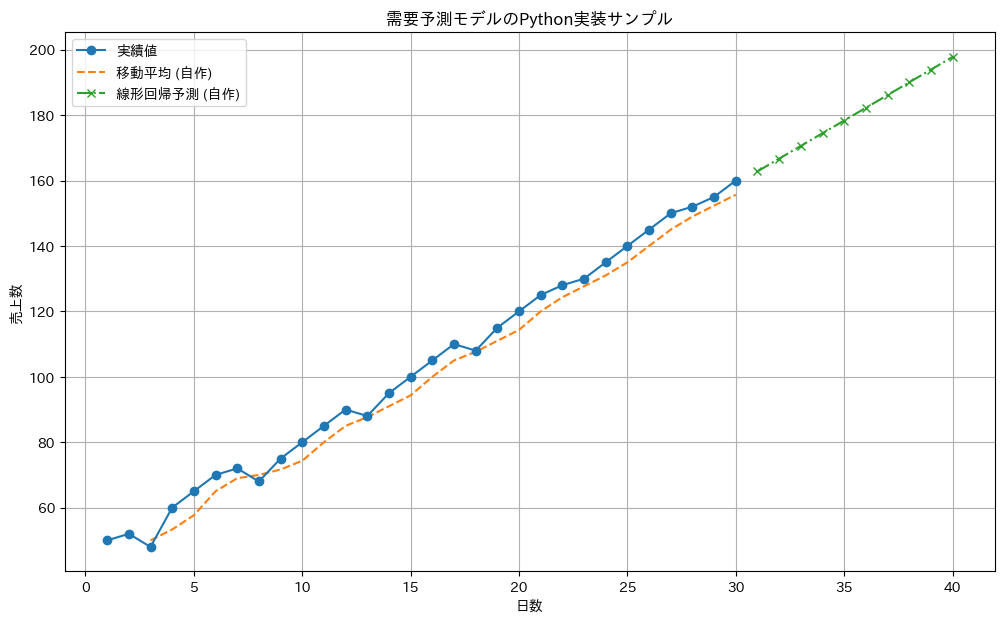

In [1]:
# -----------------------------------------------------------------------------
# ポートフォリオ
# 作成者: Logical Code .Y
# -----------------------------------------------------------------------------

# --- 0. 準備 ---
# 日本語グラフを表示するためのライブラリをインストール
!pip install japanize-matplotlib
import japanize_matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# --- 1. サンプルデータの作成 ---
# 30日間の架空の売上データ
days = np.arange(1, 31)
sales = np.array([50, 52, 48, 60, 65, 70, 72, 68, 75, 80,
                  85, 90, 88, 95, 100, 105, 110, 108, 115, 120,
                  125, 128, 130, 135, 140, 145, 150, 152, 155, 160])
df = pd.DataFrame({"day": days, "sales": sales})
X = df["day"].values.reshape(-1, 1)
y = df["sales"].values

# --- 2. 移動平均の実装 ---
def calculate_moving_average(data, window_size=3):
    moving_averages = []
    for i in range(len(data)):
        if i < window_size - 1:
            moving_averages.append(np.nan)
        else:
            window = data[i - window_size + 1 : i + 1]
            moving_averages.append(np.mean(window))
    return np.array(moving_averages)

df["moving_avg_manual"] = calculate_moving_average(df["sales"])

# --- 3. 線形回帰の数式実装（最小二乗法） ---
# 正規方程式 θ = (XᵀX)⁻¹Xᵀy をプログラム化
def train_linear_regression_from_scratch(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    # np.linalg.invよりも数値的に安定している疑似逆行列(pinv)を使用
    params = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    b, a = params[0], params[1]
    return a, b

a_manual, b_manual = train_linear_regression_from_scratch(X, y)

# フィッティングした線形回帰モデルを使い、10日先までの売上を推定
future_days = np.arange(31, 41)
future_pred_manual = a_manual * future_days + b_manual

# --- 4.【答え合わせ】scikit-learnとの比較 ---
# 検証のためにライブラリで比較しています
model = LinearRegression()
model.fit(X, y)
print("--- scikit-learnの結果 ---")
print(f"係数 a: {model.coef_[0]:.4f}, 切片 b: {model.intercept_:.4f}")
print("\n--- 自作関数の結果 ---")
print(f"係数 a: {a_manual:.4f}, 切片 b: {b_manual:.4f}")
print("\n=> 実装が業界標準ライブラリと一致していることを確認できます。")

# --- 5. グラフ出力と画像ファイルへの保存 ---
plt.figure(figsize=(12, 7))
plt.plot(df["day"], df["sales"], label="実績値", marker="o", zorder=3)
plt.plot(df["day"], df["moving_avg_manual"], label="移動平均 (自作)", linestyle="--")
plt.plot(future_days, future_pred_manual, label="線形回帰予測 (自作)", linestyle="-.", marker="x")
plt.xlabel("日数")
plt.ylabel("売上数")
plt.title("需要予測モデルのPython実装サンプル")
plt.legend()
plt.grid(True)

# GitHubのREADMEに表示するための画像ファイルとして保存
plt.savefig("demand_prediction_sample.png", dpi=150, bbox_inches="tight")
plt.show()